<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/Seattle/Categorizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import ast

In [5]:
# Carga desde un archivo .csv desde equipo
data = pd.read_csv('Seattle_sin_nulos.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,5.0,5.0,5.0,5.0,5.0,5.0,0,2,0.88,15.0
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,5.0,5.0,5.0,5.0,5.0,5.0,0,10,1.16,15.0
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,5.0,5.0,5.0,5.0,5.0,5.0,0,2,0.64,15.0
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,5.0,5.0,5.0,5.0,5.0,5.0,0,2,0.51,15.0
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,5.0,4.0,5.0,5.0,5.0,5.0,0,2,0.61,15.0
5,24/06/2024,city scrape,Amanda,within an hour,"['email', 'phone']",Whittier Heights,Entire guest suite,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,5.0,5.0,5.0,5.0,5.0,5.0,1,1,6.12,14.0


In [6]:
# Comprobamos valores nulos
data.isnull().sum().sum()

0

In [7]:
# Verificamos información
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    6442 non-null   object 
 1   source                          6442 non-null   object 
 2   host_name                       6442 non-null   object 
 3   host_response_time              6442 non-null   object 
 4   host_verifications              6442 non-null   object 
 5   neighbourhood_cleansed          6442 non-null   object 
 6   property_type                   6442 non-null   object 
 7   room_type                       6442 non-null   object 
 8   bathrooms_text                  6442 non-null   object 
 9   amenities                       6442 non-null   object 
 10  calendar_last_scraped           6442 non-null   object 
 11  host_id                         6442 non-null   int64  
 12  host_since                      64

##PRIMERAS TRANSFORMACIONES (CONTEO)

In [8]:
# Conteo para la variable "amenities" y "host_verifications"
data['amenities_num'] = data['amenities'].apply(ast.literal_eval)
data["host_verifications_num"] = data['host_verifications'].apply(ast.literal_eval)
# Crear una nueva columna que cuenta los elementos de la lista
data['amenities_num'] = data['amenities_num'].apply(len)
data['host_verifications_num'] = data['host_verifications_num'].apply(len)

In [9]:
#Comprobación rápida de "amenities"
dfWhere = data[["amenities","amenities_num"]]
dfWhere
dfWhere[dfWhere["amenities_num"] == 2]
dfWhere[dfWhere["amenities_num"] == 0]

,amenities,amenities_num
1540,[],0
1560,[],0
2538,[],0
2815,[],0
3606,[],0
5449,[],0
6250,[],0


In [10]:
#Comprobación rápida de "host_verifications"
dfWhere1 = data[["host_verifications","host_verifications_num"]]
dfWhere1
dfWhere1[dfWhere1["host_verifications_num"] == 2]
dfWhere1[dfWhere1["host_verifications_num"] == 0]

,host_verifications,host_verifications_num
6215,[],0


## SEPARAR EL DATAFRAME EN NÚMERICA Y OBJETOS

In [11]:
# Creamos 2 DataFrames para poder procesar los outliers
cuantitativas = data.select_dtypes(include = [int, np.float64])
cualitativas = data.select_dtypes(include = [object])

In [12]:
cuantitativas

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,amenities_num,host_verifications_num
0,14942,2009,90.0,44.0,0.0,4,5,1,1,47.654440,...,5.0,5.0,5.0,5.0,0,2,0.88,15.0,29,2
1,30559,2009,98.0,98.0,1.0,10,11,1,1,47.550170,...,5.0,5.0,5.0,5.0,0,10,1.16,15.0,53,2
2,31481,2009,100.0,80.0,1.0,2,2,1,1,47.554950,...,5.0,5.0,5.0,5.0,0,2,0.64,15.0,63,2
3,31481,2009,100.0,80.0,1.0,2,2,1,1,47.556270,...,5.0,5.0,5.0,5.0,0,2,0.51,15.0,57,2
4,14942,2009,90.0,44.0,0.0,4,5,1,1,47.656080,...,5.0,5.0,5.0,5.0,0,2,0.61,15.0,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,398317720,2021,100.0,99.0,1.0,130,134,1,1,47.676760,...,5.0,5.0,5.0,5.0,1,66,1.78,3.0,45,2
6438,184675574,2018,100.0,99.0,0.0,4,5,1,1,47.665714,...,5.0,5.0,5.0,5.0,1,4,1.78,6.0,17,2
6439,584875397,2024,97.6,92.3,0.0,1,1,0,1,47.531331,...,5.0,5.0,5.0,5.0,0,1,1.78,0.0,37,2
6440,581629893,2024,72.0,100.0,0.0,6,18,1,1,47.509680,...,5.0,5.0,5.0,5.0,1,1,1.78,0.0,47,1


In [13]:
cualitativas

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,calendar_last_scraped
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",24/06/2024
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",24/06/2024
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",24/06/2024
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",24/06/2024
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",25/06/2024
...,...,...,...,...,...,...,...,...,...,...,...
6437,25/06/2024,city scrape,Joanne,within an hour,"['email', 'phone']",Phinney Ridge,Entire home,Entire home/apt,4 baths,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",25/06/2024
6438,24/06/2024,city scrape,Anna,within an hour,"['email', 'phone']",Bryant,Private room in home,Private room,1 shared bath,"[""Washer"", ""Wifi"", ""Hangers"", ""Dryer"", ""Smoke ...",24/06/2024
6439,24/06/2024,city scrape,Aaron,within an hour,"['email', 'phone']",Roxhill,Entire home,Entire home/apt,1.5 baths,"[""Ping pong table"", ""Record player"", ""Smart lo...",24/06/2024
6440,24/06/2024,city scrape,Sudip,within an hour,['phone'],Rainier Beach,Private room in home,Private room,3 baths,"[""Rice maker"", ""Luggage dropoff allowed"", ""Ref...",24/06/2024


## DIAGRAMA DE CAJA

<Figure size 1500x800 with 0 Axes>

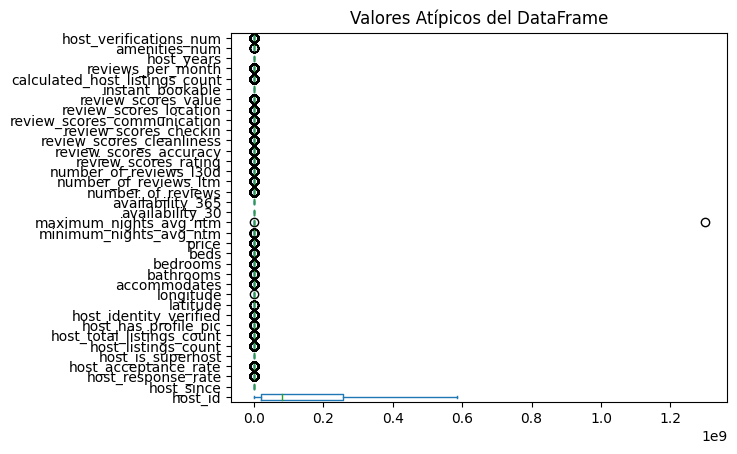

In [14]:
# Realizamos diagrama de caja o bigote de cada columna del DataFrame
fig = plt.figure(figsize = (15,8))
cuantitativas.plot(kind = 'box', vert = False)
plt.title('Valores Atípicos del DataFrame')
plt.show() # Dibujamos el diagrama

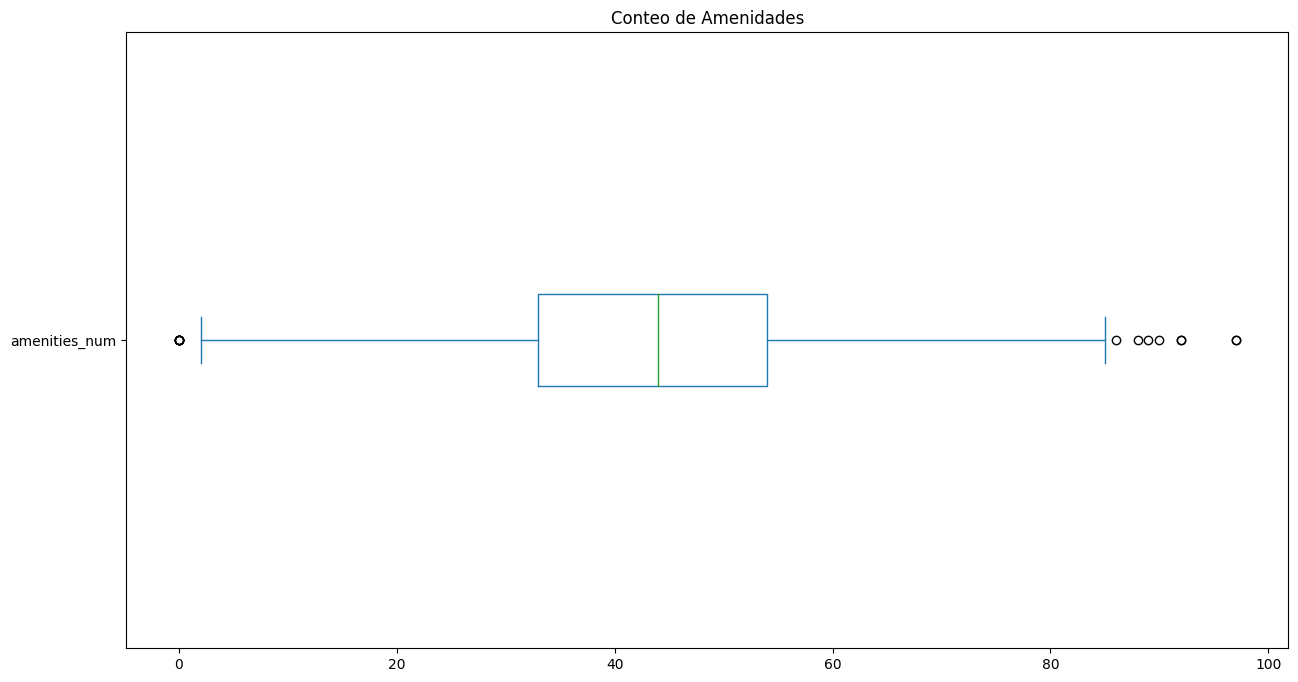

In [15]:
# Dividimos el dataframe en subconjuntos para ver el boxplot en las proporciones
dataAmenities = cuantitativas["amenities_num"]
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
dataAmenities.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Conteo de Amenidades")
plt.show() #Se muestra el diagrama

## SELECCIÓN DE COLUMNAS PARA SOMETER A OUTLIERS

In [16]:
dataSelect = cuantitativas[["host_total_listings_count","accommodates","minimum_nights_avg_ntm","maximum_nights_avg_ntm","availability_365",
                          "number_of_reviews","reviews_per_month","price","beds","amenities_num"]]
dataSelect

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,5,1,30.0,1125.0,147,160,0.88,99.0,1.0,29
1,11,2,2.0,90.0,337,196,1.16,76.0,1.0,53
2,2,4,3.0,1125.0,133,97,0.64,189.0,3.0,63
3,2,3,2.0,1125.0,1,77,0.51,125.0,2.0,57
4,5,4,30.0,200.0,16,96,0.61,167.0,2.0,28
...,...,...,...,...,...,...,...,...,...,...
6437,134,12,1.8,365.0,324,0,1.78,481.0,6.0,45
6438,5,2,2.0,30.0,26,0,1.78,82.0,1.0,17
6439,1,4,2.0,29.0,171,0,1.78,222.0,2.0,37
6440,18,2,1.0,62.0,260,0,1.78,40.0,1.0,47


In [17]:
cuantitativas.drop(["host_total_listings_count","accommodates","minimum_nights_avg_ntm","maximum_nights_avg_ntm","availability_365","number_of_reviews","reviews_per_month",
                    "price","beds","amenities_num"], axis = 1, inplace = True)
cuantitativas

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_years,host_verifications_num
0,14942,2009,90.0,44.0,0.0,4,1,1,47.654440,-122.336290,...,5.0,5.0,5.0,5.0,5.0,5.0,0,2,15.0,2
1,30559,2009,98.0,98.0,1.0,10,1,1,47.550170,-122.319370,...,5.0,5.0,5.0,5.0,5.0,5.0,0,10,15.0,2
2,31481,2009,100.0,80.0,1.0,2,1,1,47.554950,-122.386630,...,5.0,5.0,5.0,5.0,5.0,5.0,0,2,15.0,2
3,31481,2009,100.0,80.0,1.0,2,1,1,47.556270,-122.386070,...,5.0,5.0,5.0,5.0,5.0,5.0,0,2,15.0,2
4,14942,2009,90.0,44.0,0.0,4,1,1,47.656080,-122.336020,...,5.0,4.0,5.0,5.0,5.0,5.0,0,2,15.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,398317720,2021,100.0,99.0,1.0,130,1,1,47.676760,-122.358820,...,5.0,5.0,5.0,5.0,5.0,5.0,1,66,3.0,2
6438,184675574,2018,100.0,99.0,0.0,4,1,1,47.665714,-122.289243,...,5.0,5.0,5.0,5.0,5.0,5.0,1,4,6.0,2
6439,584875397,2024,97.6,92.3,0.0,1,0,1,47.531331,-122.374214,...,5.0,5.0,5.0,5.0,5.0,5.0,0,1,0.0,2
6440,581629893,2024,72.0,100.0,0.0,6,1,1,47.509680,-122.256950,...,5.0,5.0,5.0,5.0,5.0,5.0,1,1,0.0,1


**PROCEDIMIENTO DESVIACIÓN ESTÁNDAR**

In [18]:
# Encuentra los valores extremos
y = dataSelect
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print('Límite superior permitido', Limite_Superior)
print('Límite inferior permitido', Limite_Inferior)

Límite superior permitido host_total_listings_count    3.894704e+03
accommodates                 1.200787e+01
minimum_nights_avg_ntm       6.736919e+01
maximum_nights_avg_ntm       4.877565e+07
availability_365             5.320793e+02
number_of_reviews            4.195348e+02
reviews_per_month            9.415014e+00
price                        8.548370e+02
beds                         6.713057e+00
amenities_num                8.638731e+01
dtype: float64
Límite inferior permitido host_total_listings_count   -3.207363e+03
accommodates                -3.833705e+00
minimum_nights_avg_ntm      -4.425190e+01
maximum_nights_avg_ntm      -4.837074e+07
availability_365            -1.655642e+02
number_of_reviews           -2.700936e+02
reviews_per_month           -5.012524e+00
price                       -4.359345e+02
beds                        -2.532368e+00
amenities_num               -1.687483e-01
dtype: float64


In [19]:
# Obtenemos los datos y los outliers se convierten en nulos en el dataframe
OutliersNull = dataSelect[(y <= Limite_Superior) & (y >= Limite_Inferior)]
OutliersNull

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,5.0,1.0,30.0,1125.0,147,160.0,0.88,99.0,1.0,29.0
1,11.0,2.0,2.0,90.0,337,196.0,1.16,76.0,1.0,53.0
2,2.0,4.0,3.0,1125.0,133,97.0,0.64,189.0,3.0,63.0
3,2.0,3.0,2.0,1125.0,1,77.0,0.51,125.0,2.0,57.0
4,5.0,4.0,30.0,200.0,16,96.0,0.61,167.0,2.0,28.0
...,...,...,...,...,...,...,...,...,...,...
6437,134.0,12.0,1.8,365.0,324,0.0,1.78,481.0,6.0,45.0
6438,5.0,2.0,2.0,30.0,26,0.0,1.78,82.0,1.0,17.0
6439,1.0,4.0,2.0,29.0,171,0.0,1.78,222.0,2.0,37.0
6440,18.0,2.0,1.0,62.0,260,0.0,1.78,40.0,1.0,47.0


In [20]:
# Corroboramos
OutliersNull.isnull().sum()

,0
host_total_listings_count,359
accommodates,93
minimum_nights_avg_ntm,47
maximum_nights_avg_ntm,1
availability_365,0
number_of_reviews,147
reviews_per_month,33
price,63
beds,118
amenities_num,7


In [21]:
# Reemplazar valores atípicos (nulos) del dataframe con el promedio
# Realizamos una copia del dataframe
dataCleanDesv = OutliersNull.copy()
dataCleanDesv = dataCleanDesv.fillna(round(OutliersNull.mean(),0))
dataCleanDesv

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,5.0,1.0,30.0,1125.0,147,160.0,0.88,99.0,1.0,29.0
1,11.0,2.0,2.0,90.0,337,196.0,1.16,76.0,1.0,53.0
2,2.0,4.0,3.0,1125.0,133,97.0,0.64,189.0,3.0,63.0
3,2.0,3.0,2.0,1125.0,1,77.0,0.51,125.0,2.0,57.0
4,5.0,4.0,30.0,200.0,16,96.0,0.61,167.0,2.0,28.0
...,...,...,...,...,...,...,...,...,...,...
6437,134.0,12.0,1.8,365.0,324,0.0,1.78,481.0,6.0,45.0
6438,5.0,2.0,2.0,30.0,26,0.0,1.78,82.0,1.0,17.0
6439,1.0,4.0,2.0,29.0,171,0.0,1.78,222.0,2.0,37.0
6440,18.0,2.0,1.0,62.0,260,0.0,1.78,40.0,1.0,47.0


In [22]:
# Corroboramos los valores nulos en el data clean
dataCleanDesv.isnull().sum().sum()

0

In [23]:
# Convertir DataFrame a CSV
dataCleanDesv.to_csv('dataCleanDesv.csv')

In [24]:
# Descargar archivo filtrado en CSV
from google.colab import files

files.download('dataCleanDesv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Eliminación de Outliers usando el rango Intercuartilico (Método de Outliers elegido)

In [25]:
# Método aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75
y = dataSelect
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

LimiteSuperiorIqr = percentile75 + 1.5*iqr
LimiteInferiorIqr = percentile25 + 1.5*iqr

print("Límite superior permitido:\n\n", LimiteSuperiorIqr)
print("Límite inferior permitido:\n\n", LimiteInferiorIqr)

Límite superior permitido:

 host_total_listings_count      67.00
accommodates                    9.50
minimum_nights_avg_ntm         72.00
maximum_nights_avg_ntm       2265.00
availability_365              616.00
number_of_reviews             236.50
reviews_per_month               6.41
price                         430.00
beds                            6.00
amenities_num                  85.50
dtype: float64
Límite inferior permitido:

 host_total_listings_count      41.00
accommodates                    6.50
minimum_nights_avg_ntm         44.00
maximum_nights_avg_ntm       1505.00
availability_365              402.00
number_of_reviews             143.50
reviews_per_month               4.17
price                         306.00
beds                            4.00
amenities_num                  64.50
dtype: float64


In [26]:
# Obtener los valores limpios del dataframe
# Obtenemos los datos y los outliers se convierten en nulos en el dataframe
OutliersNullIqr = dataSelect[(y <= Limite_Superior) & (y >= Limite_Inferior)]
OutliersNullIqr

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,5.0,1.0,30.0,1125.0,147,160.0,0.88,99.0,1.0,29.0
1,11.0,2.0,2.0,90.0,337,196.0,1.16,76.0,1.0,53.0
2,2.0,4.0,3.0,1125.0,133,97.0,0.64,189.0,3.0,63.0
3,2.0,3.0,2.0,1125.0,1,77.0,0.51,125.0,2.0,57.0
4,5.0,4.0,30.0,200.0,16,96.0,0.61,167.0,2.0,28.0
...,...,...,...,...,...,...,...,...,...,...
6437,134.0,12.0,1.8,365.0,324,0.0,1.78,481.0,6.0,45.0
6438,5.0,2.0,2.0,30.0,26,0.0,1.78,82.0,1.0,17.0
6439,1.0,4.0,2.0,29.0,171,0.0,1.78,222.0,2.0,37.0
6440,18.0,2.0,1.0,62.0,260,0.0,1.78,40.0,1.0,47.0


In [27]:
# Contar los outliers
OutliersNullIqr.isnull().sum()

,0
host_total_listings_count,359
accommodates,93
minimum_nights_avg_ntm,47
maximum_nights_avg_ntm,1
availability_365,0
number_of_reviews,147
reviews_per_month,33
price,63
beds,118
amenities_num,7


In [28]:
# Reemplazar valores atípicos (nulos) del dataframe con el promedio
# Realizamos una copia del dataframe
dataCleanIqr = OutliersNullIqr.copy()
dataCleanIqr = dataCleanIqr.fillna(round(OutliersNullIqr.mean(),0))
dataCleanIqr

,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,5.0,1.0,30.0,1125.0,147,160.0,0.88,99.0,1.0,29.0
1,11.0,2.0,2.0,90.0,337,196.0,1.16,76.0,1.0,53.0
2,2.0,4.0,3.0,1125.0,133,97.0,0.64,189.0,3.0,63.0
3,2.0,3.0,2.0,1125.0,1,77.0,0.51,125.0,2.0,57.0
4,5.0,4.0,30.0,200.0,16,96.0,0.61,167.0,2.0,28.0
...,...,...,...,...,...,...,...,...,...,...
6437,134.0,12.0,1.8,365.0,324,0.0,1.78,481.0,6.0,45.0
6438,5.0,2.0,2.0,30.0,26,0.0,1.78,82.0,1.0,17.0
6439,1.0,4.0,2.0,29.0,171,0.0,1.78,222.0,2.0,37.0
6440,18.0,2.0,1.0,62.0,260,0.0,1.78,40.0,1.0,47.0


In [29]:
# Comprobamos que hemos reemplazado los datos correctamente
dataCleanIqr.isnull().sum().sum()

0

In [30]:
# Unimos las columnas cualitativas y las cuantitativas procesadas de outliers por método de desviación estándar
dataLimpioIqr = pd.concat([cuantitativas, dataCleanIqr], axis=1)
dataLimpio = pd.concat([cualitativas, dataLimpioIqr], axis=1)
dataLimpio

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,host_total_listings_count,accommodates,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,5.0,1.0,30.0,1125.0,147,160.0,0.88,99.0,1.0,29.0
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,11.0,2.0,2.0,90.0,337,196.0,1.16,76.0,1.0,53.0
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,2.0,4.0,3.0,1125.0,133,97.0,0.64,189.0,3.0,63.0
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,2.0,3.0,2.0,1125.0,1,77.0,0.51,125.0,2.0,57.0
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,5.0,4.0,30.0,200.0,16,96.0,0.61,167.0,2.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,25/06/2024,city scrape,Joanne,within an hour,"['email', 'phone']",Phinney Ridge,Entire home,Entire home/apt,4 baths,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,134.0,12.0,1.8,365.0,324,0.0,1.78,481.0,6.0,45.0
6438,24/06/2024,city scrape,Anna,within an hour,"['email', 'phone']",Bryant,Private room in home,Private room,1 shared bath,"[""Washer"", ""Wifi"", ""Hangers"", ""Dryer"", ""Smoke ...",...,5.0,2.0,2.0,30.0,26,0.0,1.78,82.0,1.0,17.0
6439,24/06/2024,city scrape,Aaron,within an hour,"['email', 'phone']",Roxhill,Entire home,Entire home/apt,1.5 baths,"[""Ping pong table"", ""Record player"", ""Smart lo...",...,1.0,4.0,2.0,29.0,171,0.0,1.78,222.0,2.0,37.0
6440,24/06/2024,city scrape,Sudip,within an hour,['phone'],Rainier Beach,Private room in home,Private room,3 baths,"[""Rice maker"", ""Luggage dropoff allowed"", ""Ref...",...,18.0,2.0,1.0,62.0,260,0.0,1.78,40.0,1.0,47.0


In [31]:
data

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,amenities_num,host_verifications_num
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,5.0,5.0,5.0,5.0,0,2,0.88,15.0,29,2
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,5.0,5.0,5.0,5.0,0,10,1.16,15.0,53,2
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,5.0,5.0,5.0,5.0,0,2,0.64,15.0,63,2
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,5.0,5.0,5.0,5.0,0,2,0.51,15.0,57,2
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,5.0,5.0,5.0,5.0,0,2,0.61,15.0,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,25/06/2024,city scrape,Joanne,within an hour,"['email', 'phone']",Phinney Ridge,Entire home,Entire home/apt,4 baths,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,5.0,5.0,5.0,5.0,1,66,1.78,3.0,45,2
6438,24/06/2024,city scrape,Anna,within an hour,"['email', 'phone']",Bryant,Private room in home,Private room,1 shared bath,"[""Washer"", ""Wifi"", ""Hangers"", ""Dryer"", ""Smoke ...",...,5.0,5.0,5.0,5.0,1,4,1.78,6.0,17,2
6439,24/06/2024,city scrape,Aaron,within an hour,"['email', 'phone']",Roxhill,Entire home,Entire home/apt,1.5 baths,"[""Ping pong table"", ""Record player"", ""Smart lo...",...,5.0,5.0,5.0,5.0,0,1,1.78,0.0,37,2
6440,24/06/2024,city scrape,Sudip,within an hour,['phone'],Rainier Beach,Private room in home,Private room,3 baths,"[""Rice maker"", ""Luggage dropoff allowed"", ""Ref...",...,5.0,5.0,5.0,5.0,1,1,1.78,0.0,47,1


## PREPROCESAMIENTO DE EXTRACCIÓN

In [32]:
# Asignamos categorías a las columnas de tipo texto con valores numéricos usando la libreria de sklearn
labels = LabelEncoder()
# Convertir la columna de texto a valores numéricos (Categorizar con números)
dataLimpio['room_type_num'] = labels.fit_transform(dataLimpio['room_type'])
dataLimpio['neighbourhood_cleansed_num'] = labels.fit_transform(dataLimpio['neighbourhood_cleansed'])
dataLimpio['host_response_time_num'] = labels.fit_transform(dataLimpio['host_response_time'])

In [33]:
# Obtenemos categorías para bathrooms_text:
dataLimpio['bathroom_text_clean'] = dataLimpio['bathrooms_text'].str.replace(r'^\d*\.?\d*\s?', '', regex=True).str.strip()
dataLimpio['bathroom_text_clean'] = dataLimpio['bathroom_text_clean'].str.replace("baths","bath")
dataLimpio['bathroom_text_clean'] = dataLimpio['bathroom_text_clean'].str.replace("shared baths","shared bath")
dataLimpio['bathroom_text_clean'].value_counts()
# Las volvemos numéricas:
dataLimpio['bathroom_text_num'] = labels.fit_transform(dataLimpio['bathroom_text_clean'])
dataLimpio['bathroom_text_num'].value_counts()

,count
bathroom_text_num,
3,5683
5,407
4,335
0,12
6,2
1,2
2,1


In [34]:
dataLimpio['neighbourhood_cleansed'].value_counts().index

Index(['Broadway', 'Belltown', 'University District', 'Wallingford', 'Minor',
       'Fremont', 'North Beacon Hill', 'South Lake Union',
       'Central Business District', 'Stevens', 'Atlantic', 'North Queen Anne',
       'First Hill', 'Adams', 'Greenwood', 'East Queen Anne',
       'West Queen Anne', 'Alki', 'Green Lake', 'West Woodland',
       'Columbia City', 'North Admiral', 'Lower Queen Anne', 'Eastlake',
       'Mann', 'Phinney Ridge', 'Pike-Market', 'Ravenna', 'Mount Baker',
       'Mid-Beacon Hill', 'Whittier Heights', 'Yesler Terrace',
       'Loyal Heights', 'Brighton', 'Haller Lake', 'Lawton Park',
       'Rainier Beach', 'Leschi', 'Maple Leaf', 'Fairmount Park',
       'South Delridge', 'Seward Park', 'Bryant', 'Montlake', 'Gatewood',
       'Roosevelt', 'North College Park', 'North Delridge', 'Pioneer Square',
       'Genesee', 'Crown Hill', 'Seaview', 'Riverview', 'Madrona',
       'Bitter Lake', 'South Beacon Hill', 'Fauntleroy', 'Sunset Hill',
       'Pinehurst', 'Nor

In [35]:
# Usamos np.where() para clasificar los vecindarios
dataLimpio['neighbourhood_Category'] = np.where(dataLimpio['neighbourhood_cleansed'].isin([
    'Greenwood', 'North Queen Anne', 'Phinney Ridge', 'Ravenna', 'Bitter Lake',
    'Haller Lake', 'Maple Leaf', 'Pinehurst', 'North Beach/Blue Ridge', 'Matthews Beach',
    'Victory Heights', 'Wedgwood', 'Broadview', 'Olympic Hills', 'Laurelhurst', 'Cedar Park',
    'View Ridge', 'Windermere', 'Meadowbrook']), 'Norte',
    np.where(dataLimpio['neighbourhood_cleansed'].isin([
        'North Beacon Hill', 'Mid-Beacon Hill', 'South Beacon Hill', 'Columbia City', 'Brighton',
        'Rainier Beach', 'Mount Baker', 'Dunlap', 'Seward Park', 'Rainier View',
        'Holly Park', 'South Delridge', 'South Park', 'Riverview', 'Roxhill',
        'Fairmount Park', 'High Point', 'Georgetown']), 'Sur',
        np.where(dataLimpio['neighbourhood_cleansed'].isin([
            'University District', 'Montlake', 'Bryant', 'Madrona', 'Leschi',
            'Eastlake', 'Mann', 'Harrison/Denny-Blaine', 'Madison Park']), 'Este',
            np.where(dataLimpio['neighbourhood_cleansed'].isin([
                'Broadway', 'Belltown', 'Wallingford', 'Fremont', 'South Lake Union',
                'Central Business District', 'Stevens', 'Minor', 'First Hill', 'Adams',
                'West Queen Anne', 'Lower Queen Anne', 'West Woodland', 'North Delridge',
                'Loyal Heights', 'Lawton Park', 'Gatewood', 'Genesee', 'Crown Hill',
                'Seaview', 'Fauntleroy', 'Sunset Hill', 'Briarcliff', 'Westlake',
                'Interbay', 'Industrial District', 'Alki']), 'Oeste',
                'Otra'))))

# Mostrar el DataFrame resultante
dataLimpio[['neighbourhood_cleansed', 'neighbourhood_Category']]

,neighbourhood_cleansed,neighbourhood_Category
0,Wallingford,Oeste
1,Georgetown,Sur
2,Fairmount Park,Sur
3,Fairmount Park,Sur
4,Wallingford,Oeste
...,...,...
6437,Phinney Ridge,Norte
6438,Bryant,Este
6439,Roxhill,Sur
6440,Rainier Beach,Sur


In [36]:
dataLimpio['neighbourhood_Category'].value_counts()

,count
neighbourhood_Category,
Oeste,2988
Otra,964
Sur,899
Norte,873
Este,718


In [37]:
dataLimpio.isnull().sum().sum()

0

## Conversión de moneda

In [38]:
# El precio está en moneda local, se decidió estandarizar a peso mexicano para que todos tengamos la misma información
pesoMex = 19.5560
dataLimpio["priceMex"] = dataLimpio["price"] * pesoMex

# Redondeo a dos decimales
dataLimpio["priceMex"] = np.round(dataLimpio["priceMex"],2)

# Corroboramos
dataLimpio[["priceMex","price"]].min()

,0
priceMex,195.56
price,10.00


## CATEGORIZACIÓN DE VARIABLES NUMÉRICAS

In [39]:
#Calculamos el número total de la población 'n'
dataLimpio['amenities_num'].info()
n = len(dataLimpio['amenities_num'])
n

# n de CDMX
# n de Seattle

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["amenities_num"].max()
Min = dataLimpio["amenities_num"].min()
Limites = [Min,Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni = int(ni)
ni
#Dado que los extremos de los límites más altos son los de Ottawa, se optará por manejar esta escala

# Calculamos el ancho del intervalo 'i'
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = np.linspace(Min, Max, ni)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

# Creamos las categorias
categorias = [ '(0 - 7) Básico', '(8 - 14) Limitado', '(15 - 22) Estándar', '(23 - 29) Completo', '(30 - 36) Amplio',
              '(37 - 43) Enriquecido', '(44 - 50) Superior', '(51 - 57) Extendido', '(58 - 64) Excepcional',
               '(65 - 72) Muy completo', '(73 - 79) Premium', '(80 - 86) De lujo' ]

# Finalmente creamos las categorías en la columna numérica
dataLimpio['amenitiesCat'] = pd.cut(x = dataLimpio['amenities_num'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['amenitiesCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: amenities_num
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
amenitiesCat,
(30 - 36) Amplio,1256
(44 - 50) Superior,1094
(51 - 57) Extendido,1051
(37 - 43) Enriquecido,962
(58 - 64) Excepcional,690
(23 - 29) Completo,470
(15 - 22) Estándar,327
(65 - 72) Muy completo,314
(8 - 14) Limitado,174


In [40]:
dataLimpio['amenitiesCat'].isnull().sum()

0

In [41]:
dataLimpio.isnull().sum().sum()

0

In [42]:
# HOST_TOTAL_LISTINGS_COUNT
#Calculamos el número total de la población 'n'
dataLimpio['host_total_listings_count'].info()
n = len(dataLimpio['host_total_listings_count'])

# n de CDMX
# n de Seattle

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["host_total_listings_count"].max()
Min = dataLimpio["host_total_listings_count"].min()
Limites = [Min,Max]
Limites

# Límites de CDMX: [1, 442]
# Límites de Seattle: [1, 3774]

# Calculamos el rango R
R = Max - Min
R
# Límites de CDMX: 441
# Límites de Seattle: 3773

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni

# Calculamos el ancho del intervalo 'i'
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = np.linspace(Min, Max, 12)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

categorias = ['Novato en hospedaje (1-222)', 'Propietario en crecimiento (223-444)', 'Operador experimentado (445-665)',
              'Experto en hospedaje (666-887)', 'Gran operador (888-1108)', 'Operador a gran escala (1109-1330)',
              'Operador regional consolidado (1331-1551)', 'Operador nacional (1552-1773)', 'Operador de gran volumen (1774-1994)',
              'Operador de alto impacto (1995-2216)', 'Gigante de la industria de hospedaje (2217-2437+)']

# Finalmente creamos las categorías en la columna numérica
dataLimpio['hostTotalListingsCat'] = pd.cut(x = dataLimpio['host_total_listings_count'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['hostTotalListingsCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
hostTotalListingsCat,
Novato en hospedaje (1-222),6142
Propietario en crecimiento (223-444),146
Operador experimentado (445-665),66
Operador nacional (1552-1773),57
Experto en hospedaje (666-887),29
Gran operador (888-1108),1
Gigante de la industria de hospedaje (2217-2437+),1
Operador a gran escala (1109-1330),0
Operador regional consolidado (1331-1551),0


In [43]:
mediana = dataLimpio["host_total_listings_count"].median() # Reemplaza el valor que cumple con la condición por la mediana dataLimpio.loc[dfLimpio["host_total_listings_count"] >= 3000, "host_total_listings_count"] = mediana
dataLimpio.loc[dataLimpio["host_total_listings_count"] >= 3000, "host_total_listings_count"] = mediana
dataLimpio[dataLimpio["host_total_listings_count"] >= 2500]

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_clean,bathroom_text_num,neighbourhood_Category,priceMex,amenitiesCat,hostTotalListingsCat


In [44]:
dataLimpio.isnull().sum().sum()

0

In [45]:
# ACCOMMODATES
#Calculamos el número total de la población 'n'
dataLimpio['accommodates'].info()
n = len(dataLimpio['accommodates'])

# n de CDMX
# n de Seattle

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["accommodates"].max()
Min = dataLimpio["accommodates"].min()
Limites = [Min,Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni

# Calculamos el ancho del intervalo 'i'
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = [ 1, 2, 4, 6, 8, 10, 12]

categorias = [
    '(1 - 2) Pareja',
    '(2 - 4) Familiar pequeño',
    '(4 - 6) Familiar mediano',
    '(6 - 8) Familiar grande',
    '(8 - 10) Grupo',
    '(10 - 12) Grupo grande']

# Finalmente creamos las categorías en la columna numérica
dataLimpio['accommodatesCat'] = pd.cut(x = dataLimpio['accommodates'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['accommodatesCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
accommodatesCat,
(1 - 2) Pareja,2515
(2 - 4) Familiar pequeño,2082
(4 - 6) Familiar mediano,1139
(6 - 8) Familiar grande,428
(8 - 10) Grupo,174
(10 - 12) Grupo grande,104


In [46]:
# Filtrar las filas donde 'accommodatesCategory' es nulo
dataLimpio[dataLimpio["accommodatesCat"].isnull()]

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_clean,bathroom_text_num,neighbourhood_Category,priceMex,amenitiesCat,hostTotalListingsCat,accommodatesCat


In [47]:
# Filtrar las filas donde 'accommodates' es nulo
dataLimpio[dataLimpio["accommodates"].isnull()]

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_clean,bathroom_text_num,neighbourhood_Category,priceMex,amenitiesCat,hostTotalListingsCat,accommodatesCat


In [48]:
dataLimpio.isnull().sum().sum()

0

In [49]:
# MINIMUM_NIGHTS_AVG_NTM
#Calculamos el número total de la población 'n'
dataLimpio['minimum_nights_avg_ntm'].info()
n = len(dataLimpio['minimum_nights_avg_ntm'])

# n de CDMX
# n de Seattle

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["minimum_nights_avg_ntm"].max()
Min = dataLimpio["minimum_nights_avg_ntm"].min()
Limites = [Min,Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni

# Calculamos el ancho del intervalo 'i'
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = [ 1,  9, 17, 25, 33, 41, 50, 58, 66, 74, 82, 90]

categorias = [
    '(1 - 9) Muy corto plazo',
    '(9 - 17) Corto plazo',
    '(17 - 25) Plazo intermedio',
    '(25 - 33) Plazo moderado',
    '(33 - 41) Plazo extendido',
    '(41 - 50) Largo plazo',
    '(50 - 58) Muy largo plazo',
    '(58 - 66) Prolongado',
    '(66 - 74) Extensivo',
    '(74 - 82) Larga temporada',
    '(82 - 90) Temporada completa'
]

# Finalmente creamos las categorías en la columna numérica
dataLimpio['minimumNightsCategory'] = pd.cut(x = dataLimpio['minimum_nights_avg_ntm'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['minimumNightsCategory'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: minimum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
minimumNightsCategory,
(1 - 9) Muy corto plazo,4520
(25 - 33) Plazo moderado,1437
(33 - 41) Plazo extendido,272
(9 - 17) Corto plazo,129
(17 - 25) Plazo intermedio,46
(41 - 50) Largo plazo,21
(58 - 66) Prolongado,12
(50 - 58) Muy largo plazo,5
(66 - 74) Extensivo,0


In [50]:
dataLimpio.isnull().sum().sum()

0

In [51]:
# MAXIMUM_NIGHTS_AVG_NTM
#Calculamos el número total de la población 'n'
dataLimpio['maximum_nights_avg_ntm'].info()
n = len(dataLimpio['maximum_nights_avg_ntm'])

# n de CDMX
# n de Seattle

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["maximum_nights_avg_ntm"].max()
Min = dataLimpio["maximum_nights_avg_ntm"].min()
Limites = [Min,Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni

# Calculamos el ancho del intervalo 'i'
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = np.linspace(Min, Max, 12)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

# Creamos las categorias
categorias = [
    'Muy bajo (0-833)', 'Bajo (834-1666)', 'Moderadamente bajo (1667-2499)', 'Medio bajo (2500-3333)',
    'Moderado (3334-4166)', 'Moderadamente alto (4167-4999)', 'Medio alto (5000-5833)',
    'Alto (5834-6666)', 'Muy alto (6667-7499)', 'Extremadamente alto (7500-8333)',
    'Maximo (8334-10000)'
]

# Finalmente creamos las categorías en la columna numérica
dataLimpio['maximumNightsCategory'] = pd.cut(x = dataLimpio['maximum_nights_avg_ntm'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['maximumNightsCategory'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
maximumNightsCategory,
Bajo (834-1666),3537
Muy bajo (0-833),2904
Maximo (8334-10000),1
Moderadamente bajo (1667-2499),0
Medio bajo (2500-3333),0
Moderado (3334-4166),0
Moderadamente alto (4167-4999),0
Medio alto (5000-5833),0
Alto (5834-6666),0


In [52]:
dataLimpio.isnull().sum().sum()

0

In [53]:
# AVAILABILITY_365
#Calculamos el número total de la población 'n'
dataLimpio['availability_365'].info()
n = len(dataLimpio['availability_365'])

# n de CDMX
# n de Seattle

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["availability_365"].max()
Min = dataLimpio["availability_365"].min()
Limites = [Min,Max]
Limites


# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni


# Calculamos el ancho del intervalo 'i'
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = np.linspace(Min, Max, ni)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

categorias = [
    '(0 - 30) Muy baja disponibilidad',
    '(30 - 61) Baja disponibilidad',
    '(61 - 91) Disponibilidad sencilla',
    '(91 - 122) Disponibilidad moderada',
    '(122 - 152) Disponibilidad regular',
    '(152 - 182) Disponibilidad alta',
    '(182 - 213) Muy alta disponibilidad',
    '(213 - 243) Extensa disponibilidad',
    '(243 - 274) Casi total disponibilidad',
    '(274 - 304) Disponibilidad casi completa',
    '(304 - 335) Total disponibilidad',
    '(335 - 365) Año Completo'
]

# Finalmente creamos las categorías en la columna numérica
dataLimpio['availabilityYearCat'] = pd.cut(x = dataLimpio['availability_365'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['availabilityYearCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
6442 non-null   int64
dtypes: int64(1)
memory usage: 50.5 KB


,count
availabilityYearCat,
(0 - 30) Muy baja disponibilidad,785
(304 - 335) Total disponibilidad,712
(335 - 365) Año Completo,689
(30 - 61) Baja disponibilidad,568
(274 - 304) Disponibilidad casi completa,540
(91 - 122) Disponibilidad moderada,525
(122 - 152) Disponibilidad regular,505
(61 - 91) Disponibilidad sencilla,473
(243 - 274) Casi total disponibilidad,446


In [54]:
dataLimpio.isnull().sum().sum()

0

In [55]:
# Filtrar las filas donde 'avail_365_Cat' es nulo
dataLimpio[dataLimpio["availabilityYearCat"].isnull()]

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,bathroom_text_clean,bathroom_text_num,neighbourhood_Category,priceMex,amenitiesCat,hostTotalListingsCat,accommodatesCat,minimumNightsCategory,maximumNightsCategory,availabilityYearCat


In [56]:
# NUMBER_OF_REVIEWS
#Calculamos el número total de la población 'n'
dataLimpio['number_of_reviews'].info()
n = len(dataLimpio['number_of_reviews'])

# n de CDMX
# n de Seattle

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["number_of_reviews"].max()
Min = dataLimpio["number_of_reviews"].min()
Limites = [Min,Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni


# Calculamos el ancho del intervalo 'i'
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = np.linspace(Min, Max, 12)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

categorias = [
    '(0 - 38) Muy pocas reseñas',
    '(38 - 76) Pocas reseñas',
    '(76 - 114) Reseñas limitadas',
    '(114 - 152) Reseñas moderadas',
    '(152 - 190) Buen número de reseñas',
    '(190 - 228) Reseñas sólidas',
    '(228 - 266) Muchas reseñas',
    '(266 - 304) Con mucho flujo',
    '(304 - 342) Muy comentado',
    '(342 - 380) Popular',
    '(380 - 419) Muy popular'
]
# Finalmente creamos las categorías en la columna numérica
dataLimpio['reviewsCat'] = pd.cut(x = dataLimpio['number_of_reviews'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['reviewsCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
reviewsCat,
(0 - 38) Muy pocas reseñas,3565
(38 - 76) Pocas reseñas,1098
(76 - 114) Reseñas limitadas,577
(114 - 152) Reseñas moderadas,366
(152 - 190) Buen número de reseñas,230
(190 - 228) Reseñas sólidas,193
(228 - 266) Muchas reseñas,123
(266 - 304) Con mucho flujo,99
(304 - 342) Muy comentado,81


In [57]:
dataLimpio.isnull().sum().sum()

0

In [58]:
# HOST_YEARS
#Calculamos el número total de la población 'n'
dataLimpio['host_years'].info()
n = len(dataLimpio['host_years'])

# n de CDMX
# n de Seattle

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["host_years"].max()
Min = dataLimpio["host_years"].min()
Limites = [Min,Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni

# Calculamos el ancho del intervalo 'i'
i = R/ni
i = round(i,0)
i

# Categorización de variables
intervalos = [0, 4, 8, 12, 16]
categorias = ['Principiante (0-3 años)','Intermedio (4-7 años)','Profesional (8-11 años)','Experimentado (12-16 años)']

# Finalmente creamos las categorías en la columna numérica
dataLimpio['hostYearsCat'] = pd.cut(x = dataLimpio['host_years'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['hostYearsCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: host_years
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
hostYearsCat,
Profesional (8-11 años),2431
Intermedio (4-7 años),2352
Principiante (0-3 años),1412
Experimentado (12-16 años),247


In [59]:
dataLimpio.isnull().sum().sum()

0

In [60]:
dataLimpio['priceMex'].info()
n - len (dataLimpio['priceMex'])
n

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["priceMex"].max()
Min = dataLimpio["priceMex"].min()
Limites = [Min,Max]
Limites


# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni

# Categorización de variables
intervalos = np.linspace(194, Max, 12)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

categorias = [
    'Asequible (194-1,501)',
    'Económico (1,502-2,985)',
    'Moderado (2,986-4,468)',
    'Alto (4,469-5,951)',
    'Notable (5,952-7,434)',
    'Sofisticado (7,435-8,917)',
    'Lujoso (8,918-10,400)',
    'Alto Nivel (10,401-11,883)',
    'Premium (11,884-13,366)',
    'Pre - Sir (13,367-14,849)',
    'Sir (14,850-16,486)',
]

# Finalmente creamos las categorías en la columna numérica
dataLimpio['priceMexCategory'] = pd.cut(x = dataLimpio['priceMex'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['priceMexCategory'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: priceMex
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
priceMexCategory,
"Económico (1,502-2,985)",2126
"Moderado (2,986-4,468)",1969
"Asequible (194-1,501)",734
"Alto (4,469-5,951)",726
"Notable (5,952-7,434)",397
"Sofisticado (7,435-8,917)",232
"Lujoso (8,918-10,400)",114
"Alto Nivel (10,401-11,883)",67
"Premium (11,884-13,366)",36


In [61]:
dataLimpio

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,priceMex,amenitiesCat,hostTotalListingsCat,accommodatesCat,minimumNightsCategory,maximumNightsCategory,availabilityYearCat,reviewsCat,hostYearsCat,priceMexCategory
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,1936.04,(23 - 29) Completo,Novato en hospedaje (1-222),(1 - 2) Pareja,(25 - 33) Plazo moderado,Bajo (834-1666),(122 - 152) Disponibilidad regular,(152 - 190) Buen número de reseñas,Experimentado (12-16 años),"Económico (1,502-2,985)"
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,1486.26,(51 - 57) Extendido,Novato en hospedaje (1-222),(1 - 2) Pareja,(1 - 9) Muy corto plazo,Muy bajo (0-833),(335 - 365) Año Completo,(190 - 228) Reseñas sólidas,Experimentado (12-16 años),"Asequible (194-1,501)"
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,3696.08,(58 - 64) Excepcional,Novato en hospedaje (1-222),(2 - 4) Familiar pequeño,(1 - 9) Muy corto plazo,Bajo (834-1666),(122 - 152) Disponibilidad regular,(76 - 114) Reseñas limitadas,Experimentado (12-16 años),"Moderado (2,986-4,468)"
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,2444.50,(51 - 57) Extendido,Novato en hospedaje (1-222),(2 - 4) Familiar pequeño,(1 - 9) Muy corto plazo,Bajo (834-1666),(0 - 30) Muy baja disponibilidad,(76 - 114) Reseñas limitadas,Experimentado (12-16 años),"Económico (1,502-2,985)"
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,3265.85,(23 - 29) Completo,Novato en hospedaje (1-222),(2 - 4) Familiar pequeño,(25 - 33) Plazo moderado,Muy bajo (0-833),(0 - 30) Muy baja disponibilidad,(76 - 114) Reseñas limitadas,Experimentado (12-16 años),"Moderado (2,986-4,468)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,25/06/2024,city scrape,Joanne,within an hour,"['email', 'phone']",Phinney Ridge,Entire home,Entire home/apt,4 baths,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,9406.44,(44 - 50) Superior,Novato en hospedaje (1-222),(10 - 12) Grupo grande,(1 - 9) Muy corto plazo,Muy bajo (0-833),(304 - 335) Total disponibilidad,(0 - 38) Muy pocas reseñas,Principiante (0-3 años),"Lujoso (8,918-10,400)"
6438,24/06/2024,city scrape,Anna,within an hour,"['email', 'phone']",Bryant,Private room in home,Private room,1 shared bath,"[""Washer"", ""Wifi"", ""Hangers"", ""Dryer"", ""Smoke ...",...,1603.59,(15 - 22) Estándar,Novato en hospedaje (1-222),(1 - 2) Pareja,(1 - 9) Muy corto plazo,Muy bajo (0-833),(0 - 30) Muy baja disponibilidad,(0 - 38) Muy pocas reseñas,Intermedio (4-7 años),"Asequible (194-1,501)"
6439,24/06/2024,city scrape,Aaron,within an hour,"['email', 'phone']",Roxhill,Entire home,Entire home/apt,1.5 baths,"[""Ping pong table"", ""Record player"", ""Smart lo...",...,4341.43,(37 - 43) Enriquecido,Novato en hospedaje (1-222),(2 - 4) Familiar pequeño,(1 - 9) Muy corto plazo,Muy bajo (0-833),(152 - 182) Disponibilidad alta,(0 - 38) Muy pocas reseñas,Principiante (0-3 años),"Moderado (2,986-4,468)"
6440,24/06/2024,city scrape,Sudip,within an hour,['phone'],Rainier Beach,Private room in home,Private room,3 baths,"[""Rice maker"", ""Luggage dropoff allowed"", ""Ref...",...,782.24,(44 - 50) Superior,Novato en hospedaje (1-222),(1 - 2) Pareja,(1 - 9) Muy corto pla

In [62]:
dataLimpio.isnull().sum().sum()

0

In [63]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dataLimpio['host_response_rate'].info()
n - len (dataLimpio['host_response_rate'])
n

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio['host_response_rate'].max()
Min = dataLimpio['host_response_rate'].min()
Limites = [Min,Max]
Limites


# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni

# Categorización de variables
intervalos = np.linspace(Min, Max, 12)
intervalos = np.round(intervalos, 0).astype(int)
intervalos

categorias = [
    '(0 - 9) Muy baja tasa de respuesta',
    '(9 - 18) Baja tasa de respuesta',
    '(18 - 27) Tasa de respuesta limitada',
    '(27 - 36) Tasa de respuesta moderada',
    '(36 - 45) Tasa de respuesta adecuada',
    '(45 - 55) Tasa de respuesta buena',
    '(55 - 64) Alta tasa de respuesta',
    '(64 - 73) Muy buena tasa de respuesta',
    '(73 - 82) Excelente tasa de respuesta',
    '(82 - 91) Tasa de respuesta sobresaliente',
    '(91 - 100) Tasa de respuesta perfecta'
]
# Finalmente creamos las categorías en la columna numérica
dataLimpio['hostResponseCat'] = pd.cut(x = dataLimpio['host_response_rate'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['hostResponseCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
hostResponseCat,
(91 - 100) Tasa de respuesta perfecta,6114
(82 - 91) Tasa de respuesta sobresaliente,170
(0 - 9) Muy baja tasa de respuesta,61
(64 - 73) Muy buena tasa de respuesta,30
(73 - 82) Excelente tasa de respuesta,30
(45 - 55) Tasa de respuesta buena,17
(9 - 18) Baja tasa de respuesta,6
(27 - 36) Tasa de respuesta moderada,5
(55 - 64) Alta tasa de respuesta,5


In [64]:
dataLimpio.isnull().sum().sum()

0

In [65]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dataLimpio['host_acceptance_rate'].info()
n = len(dataLimpio['host_acceptance_rate'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["host_acceptance_rate"].max()
Min = dataLimpio["host_acceptance_rate"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni
# Dado que los extremos de los límites más altos son los de Ottawa, se optará por manejar esta escala
# Calculamos el ancho del intervalo "i"
i = R/ni
i = round(i,0)
i
# Categorización de variables
intervalos = [  0,   9,  18,  27,  36,  45,  55,  64,  73,  82,  91,
       100]
# Creamos las categorías
categorias = [
    '(0 - 9%) Muy Malo',
    '(10 - 18%) Malo',
    '(19 - 27%) Muy Bajo',
    '(28 - 36%) Bajo',
    '(37 - 45%) Medio',
    '(46 - 55%) Mejorable',
    '(56 - 64%) Aceptable',
    '(65 - 73%) Bueno',
    '(74 - 82%) Muy bueno',
    '(83 - 91%) Alto',
    '(92 - 100%) Excelente'
]

# Finalmente creamos las categorías en la columna numérica
dataLimpio['hostAcceptanceCat'] = pd.cut(x = dataLimpio['host_acceptance_rate'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['hostAcceptanceCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
hostAcceptanceCat,
(92 - 100%) Excelente,5226
(83 - 91%) Alto,465
(74 - 82%) Muy bueno,271
(0 - 9%) Muy Malo,108
(65 - 73%) Bueno,100
(56 - 64%) Aceptable,99
(46 - 55%) Mejorable,96
(28 - 36%) Bajo,38
(37 - 45%) Medio,24


In [66]:
dataLimpio.isnull().sum().sum()

0

In [67]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dataLimpio['host_verifications_num'].info()
n = len(dataLimpio['host_verifications_num'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["host_verifications_num"].max()
Min = dataLimpio["host_verifications_num"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni
# Dado que los extremos de los límites más altos son los de Ottawa, se optará por manejar esta escala
# Calculamos el ancho del intervalo "i"
i = R/ni
i = round(i,0)

# Categorización de variables
intervalos = [0,1,2,3]

categorias = [
    '(0 - 1) Verificación básica',
    '(2) Verificación moderada',
    '(3) Verificación completa']

# Finalmente creamos las categorías en la columna numérica
dataLimpio['hostVerifCat'] = pd.cut(x = dataLimpio['host_verifications_num'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['hostVerifCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: host_verifications_num
Non-Null Count  Dtype
--------------  -----
6442 non-null   int64
dtypes: int64(1)
memory usage: 50.5 KB


,count
hostVerifCat,
(2) Verificación moderada,4839
(3) Verificación completa,1260
(0 - 1) Verificación básica,343


In [68]:
dataLimpio.isnull().sum().sum()

0

In [69]:
# La columna de host_response_time ya fue categorizada previamente
dataLimpio[["host_response_time","host_response_time_num"]].value_counts()

,,count
host_response_time,host_response_time_num,
within an hour,3,5540
within a few hours,2,605
within a day,1,220
a few days or more,0,77


In [70]:
dataLimpio.isnull().sum().sum()

0

In [71]:
# La columna de bathroom_text ya fue categorizada previamente
dataLimpio[["bathroom_text_clean","bathroom_text_num"]].value_counts()

,,count
bathroom_text_clean,bathroom_text_num,
bath,3,5683
shared bath,5,407
private bath,4,335
Half-bath,0,12
Private half-bath,1,2
within an hour,6,2
Shared half-bath,2,1


In [72]:
dataLimpio.isnull().sum().sum()

0

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
labels = LabelEncoder()
dataLimpio['neighbourhood_Category_num'] = labels.fit_transform(dataLimpio['neighbourhood_Category'])

In [75]:
# La columna de neighbourhood_cleansed ya fue categorizada previamente
dataLimpio[["neighbourhood_Category","neighbourhood_Category_num"]].value_counts()

,,count
neighbourhood_Category,neighbourhood_Category_num,
Oeste,2,2988
Otra,3,964
Sur,4,899
Norte,1,873
Este,0,718


In [76]:
#Calculamos el número total de la población "n"
dataLimpio['beds'].info()
n = len(dataLimpio['beds'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["beds"].max()
Min = dataLimpio["beds"].min()
Limites = [Min, Max]
Limites

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["host_verifications_num"].max()
Min = dataLimpio["host_verifications_num"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni
# Dado que los extremos de los límites más altos son los de Ottawa, se optará por manejar esta escala
# Calculamos el ancho del intervalo "i"
i = R/ni
i = round(i,0)

# Categorización de variables
intervalos = [0,1,3,5,6]

categorias = [
    '(0 - 1) Una cama',
    '(2) Pocas camas',
    '(3 - 5) Camas múltiples',
    '(5 - 6) Muchas camas'
]

# Finalmente creamos las categorías en la columna numérica
dataLimpio['bedsCategory'] = pd.cut(x = dataLimpio['beds'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['bedsCategory'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
bedsCategory,
(2) Pocas camas,3072
(0 - 1) Una cama,2638
(3 - 5) Camas múltiples,614
(5 - 6) Muchas camas,118


In [77]:
dataLimpio.isnull().sum().sum()

0

In [78]:
#Calculamos el número total de la población "n"
dataLimpio['reviews_per_month'].info()
n = len(dataLimpio['reviews_per_month'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["reviews_per_month"].max()
Min = dataLimpio["reviews_per_month"].min()
Limites = [Min, Max]
Limites

# Calculamos el rango R
R = Max - Min
R

# Regla de Sturges: Calcular el número de Intervalos de Clase 'ni'
ni = 1 + 3.32 * np.log10(n)
ni=int(ni)
ni

# Categorización de variables
intervalos = [0,1,3,5,7,10]

categorias = [
    '(0) Sin reseñas',
    '(1) Reseña mensual mínima',
    '(2 - 5) Reseñas mensuales moderadas',
    '(5 - 7) Buen número de reseñas mensuales',
    '(7 - 9) Alta frecuencia de reseñas'
]
# Finalmente creamos las categorías en la columna numérica
dataLimpio['reviewsMonthCat'] = pd.cut(x = dataLimpio['reviews_per_month'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['reviewsMonthCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
reviewsMonthCat,
(1) Reseña mensual mínima,2900
(0) Sin reseñas,1928
(2 - 5) Reseñas mensuales moderadas,1158
(5 - 7) Buen número de reseñas mensuales,349
(7 - 9) Alta frecuencia de reseñas,107


In [79]:
dataLimpio.isnull().sum().sum()

0

## ESCALAS LIKERT

In [80]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dataLimpio['review_scores_value'].info()
n = len(dataLimpio['review_scores_value'])
n

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["review_scores_value"].max()
Min = dataLimpio["review_scores_value"].min()
Limites = [Min, Max]
Limites

intervalos = [1,2,3,4,5]

categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]

# Finalmente creamos las categorías en la columna numérica
dataLimpio['reviewScoresCat'] = pd.cut(x = dataLimpio['review_scores_value'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['reviewScoresCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
reviewScoresCat,
(5) Muy satisfecho,5644
(4) Satisfecho,729
(3) Neutral,40
(1 - 2) Insatisfecho,29


In [81]:
dataLimpio.isnull().sum().sum()

0

In [82]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dataLimpio['review_scores_location'].info()
n = len(dataLimpio['review_scores_location'])
n

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["review_scores_location"].max()
Min = dataLimpio["review_scores_location"].min()
Limites = [Min, Max]
Limites

intervalos = [1,2,3,4,5]

categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]

# Finalmente creamos las categorías en la columna numérica
dataLimpio['reviewLocationCat'] = pd.cut(x = dataLimpio['review_scores_location'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['reviewLocationCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
reviewLocationCat,
(5) Muy satisfecho,6088
(4) Satisfecho,318
(3) Neutral,25
(1 - 2) Insatisfecho,11


In [83]:
dataLimpio.isnull().sum().sum()

0

In [84]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dataLimpio['review_scores_rating'].info()
n = len(dataLimpio['review_scores_rating'])
n

# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["review_scores_rating"].max()
Min = dataLimpio["review_scores_rating"].min()
Limites = [Min, Max]
Limites
intervalos = [1,2,3,4,5]
categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]
# Finalmente creamos las categorías en la columna numérica
dataLimpio['reviewRatingCat'] = pd.cut(x = dataLimpio['review_scores_rating'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['reviewRatingCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: review_scores_rating
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
reviewRatingCat,
(5) Muy satisfecho,5886
(4) Satisfecho,498
(3) Neutral,31
(1 - 2) Insatisfecho,27


In [85]:
dataLimpio.isnull().sum().sum()

0

In [86]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dataLimpio['review_scores_cleanliness'].info()
n = len(dataLimpio['review_scores_cleanliness'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["review_scores_cleanliness"].max()
Min = dataLimpio["review_scores_cleanliness"].min()
Limites = [Min, Max]
Limites
intervalos = [1,2,3,4,5]
categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]
# Finalmente creamos las categorías en la columna numérica
dataLimpio['reviewCleanCat'] = pd.cut(x = dataLimpio['review_scores_cleanliness'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['reviewCleanCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: review_scores_cleanliness
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
reviewCleanCat,
(5) Muy satisfecho,5942
(4) Satisfecho,448
(3) Neutral,30
(1 - 2) Insatisfecho,22


In [87]:
dataLimpio.isnull().sum().sum()

0

In [88]:
# Usando el mínimo de noches promedio
#Calculamos el número total de la población "n"
dataLimpio['review_scores_communication'].info()
n = len(dataLimpio['review_scores_communication'])
n
# n de Seattle: 6,442
# Obtener el límite superior y el límite inferior de la columna objetivo
Max = dataLimpio["review_scores_communication"].max()
Min = dataLimpio["review_scores_communication"].min()
Limites = [Min, Max]
Limites
intervalos = [1,2,3,4,5]
categorias = [
    '(1 - 2) Insatisfecho',
    '(3) Neutral',
    '(4) Satisfecho',
    '(5) Muy satisfecho'
]
# Finalmente creamos las categorías en la columna numérica
dataLimpio['reviewCommunicationCat'] = pd.cut(x = dataLimpio['review_scores_communication'], bins = intervalos, labels = categorias, include_lowest=True)
dataLimpio['reviewCommunicationCat'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 6442 entries, 0 to 6441
Series name: review_scores_communication
Non-Null Count  Dtype  
--------------  -----  
6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


,count
reviewCommunicationCat,
(5) Muy satisfecho,6119
(4) Satisfecho,278
(3) Neutral,27
(1 - 2) Insatisfecho,18


In [89]:
dataLimpio.isnull().sum().sum()

0

In [90]:
# Verificamos información
dataLimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   last_scraped                    6442 non-null   object  
 1   source                          6442 non-null   object  
 2   host_name                       6442 non-null   object  
 3   host_response_time              6442 non-null   object  
 4   host_verifications              6442 non-null   object  
 5   neighbourhood_cleansed          6442 non-null   object  
 6   property_type                   6442 non-null   object  
 7   room_type                       6442 non-null   object  
 8   bathrooms_text                  6442 non-null   object  
 9   amenities                       6442 non-null   object  
 10  calendar_last_scraped           6442 non-null   object  
 11  host_id                         6442 non-null   int64   
 12  host_since          